In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### 1. Loading data

In [76]:
# load data
df = pd.read_csv(r"data\raw data\Hanoi Daily 10 years.csv") # khi nào có file data đầy đủ thì thay tên vào
df.head(1)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,9/20/2015,33.0,26.7,29.3,41.7,30.5,35.4,25.7,81.5,...,12.2,5,NaN,2015-09-20T05:44:39,2015-09-20T17:55:33,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999..."


In [77]:
df.drop('description', axis=1, inplace= True)
df.drop('stations', axis=1, inplace= True)
df = pd.get_dummies(df, columns=['icon', 'conditions'], drop_first=False)

df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,Hanoi,9/20/2015,33.0,26.7,29.3,41.7,30.5,35.4,25.7,81.5,...,False,False,False,True,False,False,False,False,False,True
1,Hanoi,9/21/2015,29.5,25.0,26.8,34.4,25.0,29.2,24.3,86.3,...,False,False,False,True,False,False,False,False,True,False
2,Hanoi,9/22/2015,28.5,25.0,25.9,32.8,25.0,26.5,24.2,90.5,...,False,False,False,True,False,False,False,False,True,False
3,Hanoi,9/23/2015,31.3,25.5,28.0,39.7,25.5,32.0,25.4,86.2,...,False,False,False,True,False,False,False,False,False,True
4,Hanoi,9/24/2015,34.5,26.5,29.9,43.5,26.5,36.4,25.9,80.4,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,Hanoi,9/22/2025,30.0,25.0,27.6,36.1,25.0,31.1,24.8,85.4,...,False,False,False,True,False,False,False,False,False,True
3656,Hanoi,9/23/2025,33.0,26.0,29.3,39.1,26.0,33.8,24.4,75.8,...,False,False,False,True,False,False,False,False,False,True
3657,Hanoi,9/24/2025,35.0,26.0,30.0,40.5,26.0,33.8,23.4,69.5,...,False,False,False,True,False,False,False,False,False,True
3658,Hanoi,9/25/2025,28.0,25.0,26.0,30.6,25.0,26.8,23.0,84.2,...,False,False,False,True,False,False,False,False,True,False


### 2. General Information - Hoàng 

### 2.1. Explaining data features
The data is collected from **VisualCrossing Weather Data**, containing features that describe the daily weather conditions of Hanoi over a 10-year period. (starting from the year 2015)

| **Tên cột** | **Ý nghĩa** | **Ví dụ giá trị** |
|--------------|-------------|------------------|
| `name` | The name of the weather observation location. | Hanoi |
| `datetime` | The date of observation in `YYYY-MM-DD` format. Each row represents one day. | 2023-01-01 |
| `tempmax` | The highest air temperature recorded during the 24-hour period (°C). | 21.3 |
| `tempmin` | The lowest air temperature recorded during the 24-hour period (°C). | 11.1 |
| `temp` | The average (mean) air temperature for the day, calculated from hourly readings (°C). | 16.9 |
| `feelslikemax` | The highest perceived temperature of the day, factoring in humidity (Heat Index) and wind (Wind Chill) (°C). | 21.3 |
| `feelslikemin` | The lowest perceived temperature of the day, factoring in humidity and wind (°C). | 11.1 |
| `feelslike` |  The average perceived temperature for the day, providing an overall sense of comfort (°C). | 16.9 |
| `dew` | Dew Point: The temperature at which air becomes saturated and water vapor condenses into dew (°C). Higher values indicate more moisture. | 10.4 |
| `humidity` | The average relative humidity for the day; the amount of water vapor in the air as a percentage of the maximum possible at that temperature (%). | 67.4 |
| `precip` | The total liquid-equivalent amount of precipitation (e.g., rain) that fell during the day (mm). | 0 |
| `precipprob` | The probability of precipitation. For historical data, it's `100` if precipitation occurred and `0` if it did not (%). | 0 |
| `precipcover` | The proportion of time during the day that measurable precipitation was recorded (%). Differentiates between short downpours and long drizzles. | 0 |
| `preciptype` | The specific type(s) of precipitation that occurred, such as rain, snow, or freezing rain. Only present when precipitation has been recorded. | `"rain"`,`"snow"`,`"freezingrain"`,`"ice"`,`"mixed"`
| `snow` | The total amount of new snow that fell during the day (cm). | 0|
| `snowdepth` |The average depth of snow on the ground, accounting for new snow and melting (cm). | 0 |
| `windgust` | The maximum instantaneous wind speed recorded during a brief surge (km/h). | 20.9 |
| `windspeed` | The average wind speed for the day (km/h). | 13 |
| `winddir` | The direction *from which* the wind is blowing, measured in degrees from true north (0° = North, 90° = East). | 332.7 |
| `sealevelpressure` | Atmospheric pressure adjusted to what it would be at sea level, allowing for standardized comparison between locations (mb). | 1023.7 |
| `cloudcover` | The average percentage of the sky obscured by clouds throughout the day (%). 0 = clear sky, 100 = overcast. | 28.4 |
| `visibility` | The average distance at which objects can be clearly seen, affected by fog, haze, etc. (km). | 9.2 |
| `solarradiation` | The average power (intensity) of solar radiation reaching the surface during the day (W/m²). | 188.8 |
| `solarenergy` |  The total accumulated solar energy received over the entire day (MJ/m²). This is the sum of radiation over time. | 16.3 |
| `uvindex` | The maximum Ultraviolet (UV) Index value recorded during the day, measuring the strength of sunburn-producing radiation. | Low: 0-2<br>Moderate: 3-5 <br>High: 6-7<br>Very High: 8-10<br>Extreme: 11+ |
| `severerisk` | A numerical rating (0-100%) that quantifies the risk of severe weather events like thunderstorms, hail, or tornadoes. |  Low risk: <30% <br>moderate risk: 30–70%<br>High risk:  >70% |
| `sunrise` | The local time of sunrise in ISO 8601 format (`YYYY-MM-DDTHH:MM:SS`). | 2023-01-01T06:33:36 |
| `sunset` | The local time of sunset in ISO 8601 format. | 2023-01-01T17:26:21 |
| `moonphase` | A value from 0 to 1 representing the moon's phase (0=new moon, 0.5=full moon, 1=next new moon). | 0.3 |
| `conditions` | A brief text summary of the dominant weather conditions for the day. | Partially cloudy |
| `description` | A more detailed sentence describing the weather throughout the day. | Partly cloudy throughout the day |
| `icon` | A text code for a visual icon representing the day's weather. | partly-cloudy-day |
| `stations` | Identifier codes for the weather station(s) that provided the data. Multiple stations can be aggregated for accuracy. | 48820099999,48823099999,... |


### 2.2. Dataset Information


In [78]:
df.info()  
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               3660 non-null   object 
 1   datetime                           3660 non-null   object 
 2   tempmax                            3660 non-null   float64
 3   tempmin                            3660 non-null   float64
 4   temp                               3660 non-null   float64
 5   feelslikemax                       3660 non-null   float64
 6   feelslikemin                       3660 non-null   float64
 7   feelslike                          3660 non-null   float64
 8   dew                                3660 non-null   float64
 9   humidity                           3660 non-null   float64
 10  precip                             3660 non-null   float64
 11  precipprob                         3660 non-null   int64

name                                    0
datetime                                0
tempmax                                 0
tempmin                                 0
temp                                    0
feelslikemax                            0
feelslikemin                            0
feelslike                               0
dew                                     0
humidity                                0
precip                                  0
precipprob                              0
precipcover                             0
preciptype                            987
snow                                    0
snowdepth                               0
windgust                                0
windspeed                               0
winddir                                 0
sealevelpressure                        0
cloudcover                              0
visibility                              0
solarradiation                          0
solarenergy                       

In [79]:
df.nunique()

name                                    1
datetime                             3660
tempmax                               258
tempmin                               179
temp                                  245
feelslikemax                          370
feelslikemin                          241
feelslike                             337
dew                                   265
humidity                              519
precip                               1174
precipprob                              2
precipcover                            24
preciptype                              1
snow                                    1
snowdepth                               1
windgust                              135
windspeed                             122
winddir                              1720
sealevelpressure                      334
cloudcover                            879
visibility                            101
solarradiation                       2078
solarenergy                       

##### 1. General Data Information

*   **Rows and Columns:** The dataset contains 3660 rows and 33 columns.
*   **Data Range:** Given that the data covers a 10-year period starting from September 20, 2015 to September 19, 2025, and contains 3660 daily entries.

##### 2. Target Column

*   For the task of "predicting the temperature in Hanoi," the target column is **`temp`** (the average daily temperature). The model’s output can be either a point prediction or a range prediction.

##### 3. Features by Data Type

Based on the `df.info()` output:

*   **`float64` (Floating-point numbers):**
    `tempmax`, `tempmin`, `temp`, `feelslikemax`, `feelslikemin`, `feelslike`, `dew`, `humidity`, `precip`, `precipcover`, `windgust`, `windspeed`, `winddir`, `sealevelpressure`, `cloudcover`, `visibility`, `solarradiation`, `solarenergy`, `severerisk`, `moonphase`.

*   **`object` (Strings or mixed types):**
    `name`, `datetime`, `preciptype`, `sunrise`, `sunset`, `conditions`, `description`, `icon`, `stations`.

*   **`datetime`:**
    Currently, **no columns** have a proper `datetime` data type.

##### 4. Data Type Appropriateness

*   The current data types are **NOT fully appropriate**.
*   **Issue:** The columns `datetime`, `sunrise`, and `sunset` are critical for time-series analysis but are incorrectly stored as `object` (string) types. This prevents time-based operations like extracting the month, year, or day of the week.
*   **Recommendation:** It is essential to convert these three columns to a `datetime` format using a function like `pd.to_datetime()` during the data preprocessing phase.

##### 5. Missing Data Analysis

From the `df.isnull().sum()` output, the features with missing data are:
*   **`preciptype`**: 987 missing values.
*   **`severerisk`**: 2660 missing values (all missing values are before 2023) 

**Analysis of zero values in `moonphase` and `severerisk`:**

*   **`moonphase`**: A value of `0` is **not missing data**. According to the data documentation, `moonphase` is a scale from 0 to 1, where `0` has a specific meaning: **New Moon**. Therefore, these zeros are valid and meaningful data points.
*   **`severerisk`**: The severerisk column shows many null values because it exists only in forecast or forecast-archive data, not in historical observations. Before 2023, Visual Crossing stored only observed data, while from 2023 onward it began including forecast archives—hence valid severerisk values appear only in recent years.

##### 6. Strategy for Handling Missing Values

*   **For `preciptype` (987 missing):**
    *   **Likely Cause:** These null values most likely correspond to days where there was no precipitation (`precip == 0`). If there is no precipitation, there is no "type" of precipitation.
    *   **Recommended Action:** Instead of dropping the rows, it is better to fill these missing values with a new category, such as **`"None"`** or **`"No Precipitation"`**. This transforms the missing information into a useful feature for the model.

*   **For `severerisk` (2660 missing):**
    *   **Issue:** The proportion of missing data is extremely high (~72.7%). Imputing (filling in) this many values would likely introduce significant bias and unreliable patterns into the model.
    *   **Recommended Action:** The safest and most robust approach is to **drop the `severerisk` column** from the dataset. It does not contain enough information to be a reliable predictor.

##### 7. Unique Value Analysis and Column Removal Recommendations

Based on the `df.nunique()` output:

*   **Columns to Remove (Low or No Variance):**

    *   `name`: Has only 1 unique value ("Hanoi"). As a constant, it provides no predictive power.
        *   **→ Recommendation: Drop this column.**
    *   `snow` and `snowdepth`: Both have only 1 unique value, which is `0` (since it does not snow in Hanoi). These are also constant columns.
        *   **→ Recommendation: Drop both columns.**

*   **Columns to Remove (Redundant Information):**

    *   `description`, `conditions`, `icon`: These three columns describe the same weather phenomena at different levels of detail (`description`: 35 values, `conditions`: 6 values, `icon`: 4 values). Including all three would be redundant (multicollinearity). The `description` column is too granular, while `conditions` and `icon` are more concise categorical features.
        *   **→ Recommendation: Keep the most informative one (e.g., `conditions`) and drop the other two.**

*   **Columns to Consider Removing (Potentially Low Information):**

    *   `stations`: This column has 16 unique values, representing the weather stations where data was sourced. For a general city-wide prediction model, the specific source of the data may not be a critical feature.
        *   **→ Recommendation: Consider dropping this column to simplify the model.**

In [80]:
variance = df.var(numeric_only= True)
print(variance)

tempmax                                33.766386
tempmin                                23.597570
temp                                   26.131346
feelslikemax                           90.609783
feelslikemin                           36.569689
feelslike                              59.483764
dew                                    34.127249
humidity                              118.969833
precip                                257.011237
precipprob                           2020.391370
precipcover                           111.813237
snow                                    0.000000
snowdepth                               0.000000
windgust                               64.218611
windspeed                              24.542006
winddir                              9560.530048
sealevelpressure                       51.013283
cloudcover                            534.313845
visibility                              3.023087
solarradiation                       5863.542171
solarenergy         

### 3. Charts
#### 3.1. Plot xu hướng nhiệt độ theo thời gian - Nhàn 

#### 3.1.1 Long-term trend
##### Yearly Temperature in Hanoi (2015-2025) Analysis

The data reveals a **clear warming trend** in Hanoi's yearly average temperature over the decade, with the average rising from approximately $23.7^{\circ}C$ in 2015 to over $25.1^{\circ}C$ in 2025. Notably, the **hottest year recorded was 2019**, peaking at $25.25^{\circ}C$, followed by a significant dip in 2022 before temperatures sharply recovered and stabilized at a high level.

##### Yearly Temperature in Hanoi (2015–2025)
The yearly average temperature in Hanoi from 2015 to 2025 exhibits a clear warming trend with significant inter-annual variability. After a period of relative cooling that bottomed out in 2022 (at ∼24.3 
∘C), the region has seen a sharp surge, peaking near ∼25.25 ∘C in 2024 and sustaining the highest thermal baseline of the decade, surpassing the previous record set in 2019 (∼25.2∘C).

C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\670926640.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


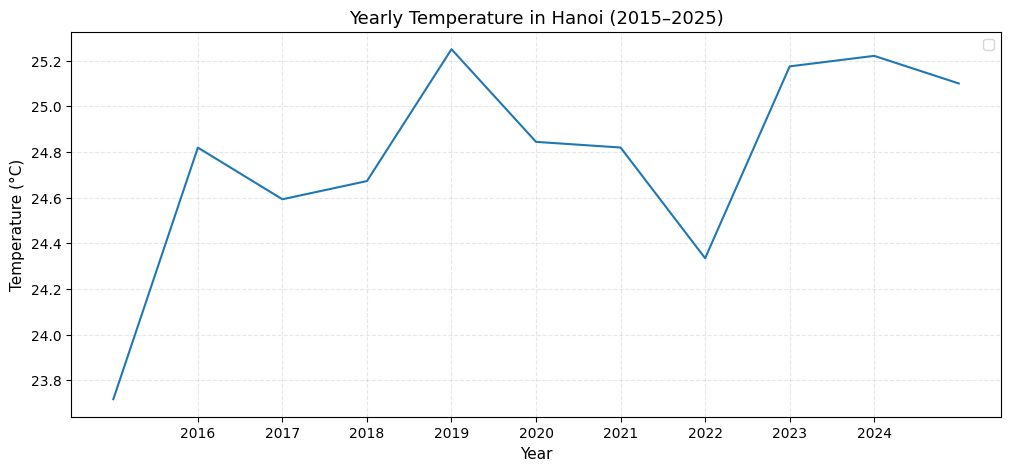

In [81]:
df["datetime"] = pd.to_datetime(df["datetime"])

plt.figure(figsize=(12,5))
plt.plot(df.groupby([df['datetime'].dt.year])['temp'].mean())
plt.title("Yearly Temperature in Hanoi (2015–2025)", fontsize=13)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Temperature (°C)", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(range(2016, 2025))
plt.legend()



##### Yearly Change in Average Temperature in Hanoi (2015-2025) Analysis

This chart illustrates the **volatility of year-over-year temperature change**, rather than the absolute temperature itself. The **largest warming increase occurred between 2015 and 2016**, with an increase of over $1.0^{\circ}C$, while the most significant cooling *relative to the previous year* happened in 2022, with a drop of approximately $-0.45^{\circ}C$. The data suggests that despite the overall warming trend shown in the previous chart, the *pace* of change is highly inconsistent.

C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\3682034730.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


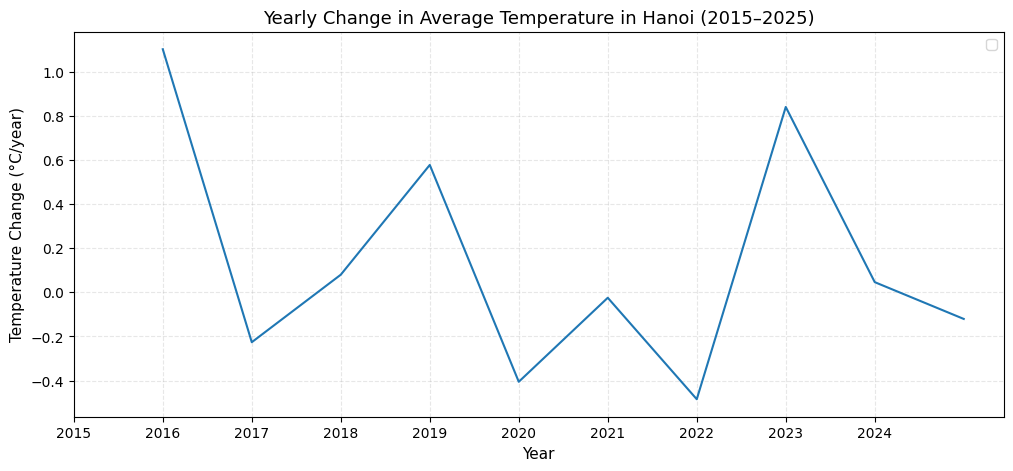

In [82]:
plt.figure(figsize=(12,5))
plt.plot(df.groupby([df['datetime'].dt.year])['temp'].mean().diff())
plt.title("Yearly Change in Average Temperature in Hanoi (2015–2025)", fontsize=13)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Temperature Change (°C/year)", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(range(2015, 2025))
plt.legend()


#### 3.1.2 Seasonality 

##### Monthly average temperature 

This chart perfectly illustrates Hanoi's distinct bimodal temperature cycle, which aligns with Vietnam's seasonal climate in the North. **Summer (June-August) is clearly the peak heat period**, with the average temperature soaring to its maximum of $30.3^{\circ}C$ in June, and remaining above $29^{\circ}C$ through August. Conversely, the **Cool/Dry Winter (December-February)** is defined by its lowest temperatures, with January averaging only $17.9^{\circ}C$. The transitions in **Spring (March-April) and Autumn (September-November)** show a steady and rapid warming/cooling, with October still registering a warm $25.9^{\circ}C$ before the steep drop into winter.

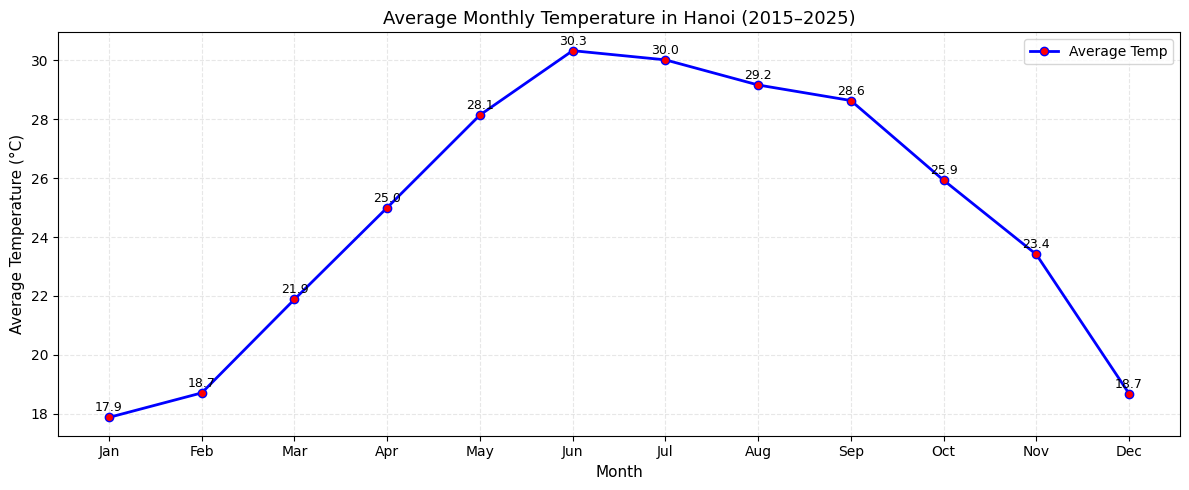

In [83]:
# Tính trung bình nhiệt độ theo tháng
monthly_avg = df.groupby(df['datetime'].dt.month)['temp'].mean()

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg.values, color='blue', marker='o', markerfacecolor='red', linestyle='-', linewidth=2, label='Average Temp')

# Ghi giá trị nhiệt độ bên trên mỗi điểm
for i, val in enumerate(monthly_avg.values):
    plt.text(monthly_avg.index[i], val + 0.2, f"{val:.1f}", ha='center', fontsize=9, color='black')

# Trang trí biểu đồ
plt.title("Average Monthly Temperature in Hanoi (2015–2025)", fontsize=13)
plt.xlabel("Month", fontsize=11)
plt.ylabel("Average Temperature (°C)", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.legend()
plt.tight_layout()
plt.show()

##### Annual Temperature Variation in Hanoi (2015–2025) Analysis

The data clearly indicates that the **annual temperature range ($\Delta$) has varied significantly over time**, suggesting an inconsistency in the severity of temperature swings. The **largest temperature range occurred in 2016** at $27.0^{\circ}C$, followed by a notably narrow range in **2023** at just $20.4^{\circ}C$. This fluctuation is primarily driven by changes in the minimum annual temperature, which dropped sharply in 2018 and 2021 (leading to wider ranges) and rose in 2023 (leading to a narrower range).

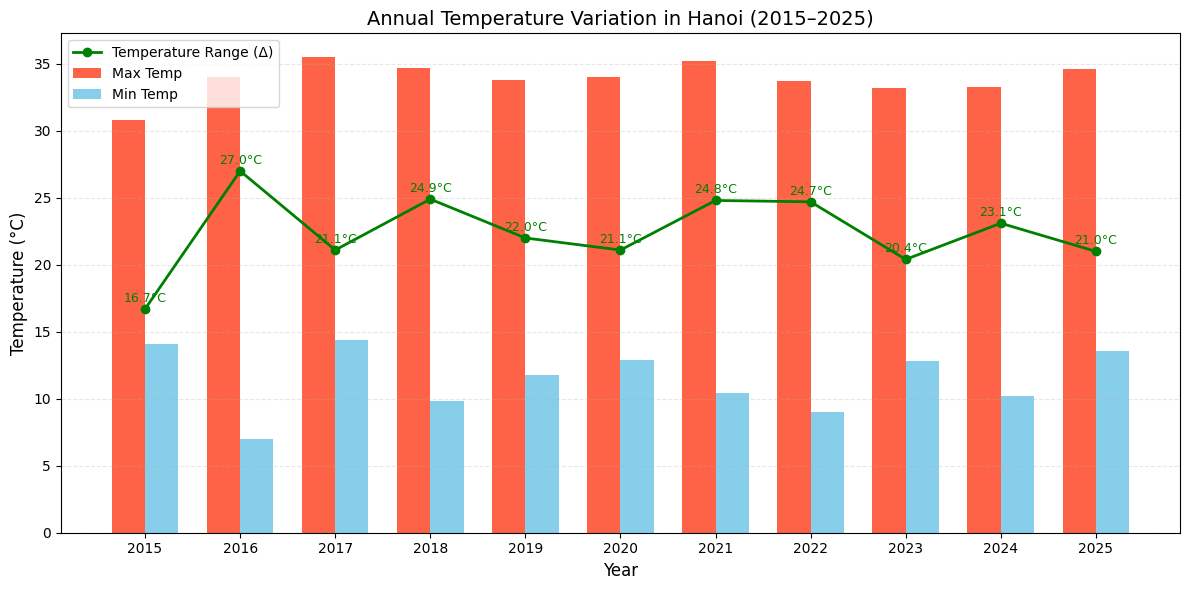

In [84]:
# Assume df has columns 'datetime' (datetime type) and 'temp' (temperature)
df['year'] = df['datetime'].dt.year

# Calculate yearly maximum, minimum, and range of temperature
yearly_stats = df.groupby('year')['temp'].agg(['max', 'min'])
yearly_stats['range'] = yearly_stats['max'] - yearly_stats['min']

# Create the figure
plt.figure(figsize=(12, 6))

# --- Draw bar charts for yearly max and min temperatures ---
bar_width = 0.35
x = range(len(yearly_stats))

plt.bar([i - bar_width/2 for i in x], yearly_stats['max'],
        width=bar_width, color='tomato', label='Max Temp')
plt.bar([i + bar_width/2 for i in x], yearly_stats['min'],
        width=bar_width, color='skyblue', label='Min Temp')

# --- Plot a line showing the annual temperature range ---
plt.plot(x, yearly_stats['range'],
         color='green', marker='o', linewidth=2, label='Temperature Range (Δ)')

# Add range values (Δ) above each point
for i, val in enumerate(yearly_stats['range']):
    plt.text(i, val + 0.3, f"{val:.1f}°C",
             ha='center', va='bottom', fontsize=9, color='green')

# --- Customize chart appearance ---
plt.title("Annual Temperature Variation in Hanoi (2015–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xticks(x, yearly_stats.index)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


#####  Trend of Extreme Temperature Days in Hanoi (2015–2025) Analysis

The chart clearly highlights an **intensifying and highly volatile trend in extreme heat**, contrasting with a stable and low number of extreme cold days. The number of **Extreme Hot Days ($>35^{\circ}C$) peaked dramatically in 2020** with 57 days, and again reached 50 days in 2023, confirming that extreme heat is a significant and increasing concern. Conversely, the number of **Extreme Cold Days ($<10^{\circ}C$) remained consistently low**, generally fluctuating between 0 and 8 days annually, demonstrating that while hot spells are intensifying, severe cold spells are rare and not trending upward.

In [85]:
extreme_days = {
    year: {
        'hot_days': df[(df['tempmax'] > 35) & (df['datetime'].dt.year == year)].shape[0],
        'cold_days': df[(df['tempmin'] < 10) & (df['datetime'].dt.year == year)].shape[0]
    }
    for year in df['datetime'].dt.year.unique()
}
extreme_days


{np.int32(2015): {'hot_days': 1, 'cold_days': 0},
 np.int32(2016): {'hot_days': 36, 'cold_days': 8},
 np.int32(2017): {'hot_days': 16, 'cold_days': 0},
 np.int32(2018): {'hot_days': 31, 'cold_days': 5},
 np.int32(2019): {'hot_days': 48, 'cold_days': 2},
 np.int32(2020): {'hot_days': 57, 'cold_days': 0},
 np.int32(2021): {'hot_days': 46, 'cold_days': 5},
 np.int32(2022): {'hot_days': 24, 'cold_days': 4},
 np.int32(2023): {'hot_days': 50, 'cold_days': 5},
 np.int32(2024): {'hot_days': 37, 'cold_days': 4},
 np.int32(2025): {'hot_days': 20, 'cold_days': 2}}

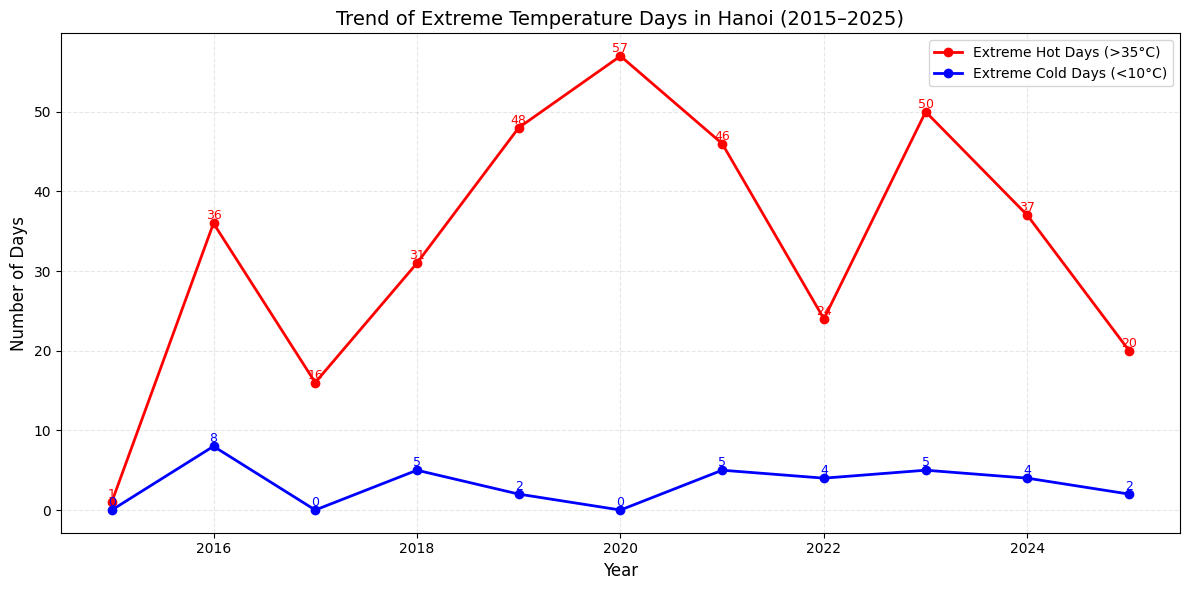

In [86]:

# Convert the dictionary into a DataFrame
extreme_df = pd.DataFrame(extreme_days).T
extreme_df.index.name = 'year'

# Create the plot
plt.figure(figsize=(12, 6))

# Plot hot days line
plt.plot(extreme_df.index, extreme_df['hot_days'],
         color='red', marker='o', linewidth=2, label='Extreme Hot Days (>35°C)')

# Plot cold days line
plt.plot(extreme_df.index, extreme_df['cold_days'],
         color='blue', marker='o', linewidth=2, label='Extreme Cold Days (<10°C)')

# Annotate values on each point
for year, val in zip(extreme_df.index, extreme_df['hot_days']):
    plt.text(year, val + 0.5, str(val), color='red', ha='center', fontsize=9)
for year, val in zip(extreme_df.index, extreme_df['cold_days']):
    plt.text(year, val + 0.5, str(val), color='blue', ha='center', fontsize=9)

# Customize chart appearance
plt.title("Trend of Extreme Temperature Days in Hanoi (2015–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Days", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


#### 3.2. histogram cho cột 'temp' (nhiệt độ trung bình hàng ngày) - Sương Mai

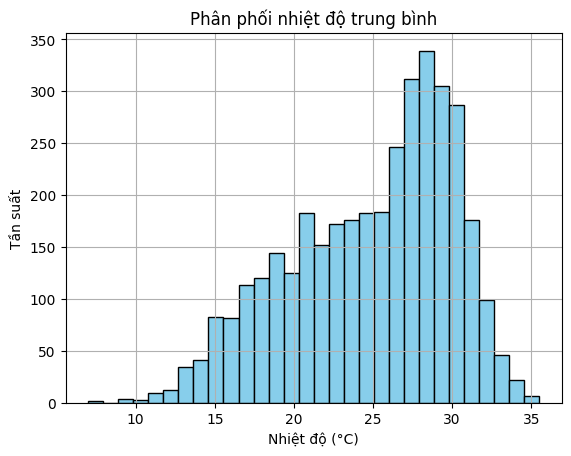

In [87]:
# Vẽ biểu đồ histogram cho cột 'temp' (nhiệt độ trung bình hàng ngày)
df["temp"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Phân phối nhiệt độ trung bình")
plt.xlabel("Nhiệt độ (°C)")
plt.ylabel("Tần suất")
plt.show()

#### Analysis
1. **Distribution Shape (Symmetry / Skewness)** <br> 
The distribution is not perfectly normal, as it has two peaks and a slight left skew, meaning the left tail (colder days) is longer than the right tail.
<br> → This suggests that hotter days are more common than unusually cold ones.
<br> → Linear statistical models might require normalization or segmentation by season for more accurate results

2. **Mode, Minimum, and Maximum** <br>
- Mode: approximately 28–30°C, corresponding to typical summer temperatures.
- Minimum: around 10°C, representing the coldest winter days.
- Maximum: around 34–35°C, reflecting the hottest days in summer.
<br>→ The majority of temperatures fall within 15–33°C, with extreme values being rare

3. **Typical Average Temperature Range** <br>
Most daily temperatures cluster between 25°C and 30°C, which can be considered the characteristic range for Hanoi’s climate — warm to hot for much of the year, typical of a humid subtropical (monsoonal) region.

4. **Number of Peaks (Seasonal Patterns)** <br>
The histogram shows two distinct peaks (bimodal distribution):<br>
- One around 19–21°C, representing the cool season (winter–spring). <br>
- Another around 28–30°C, representing the warm season (summer–autumn). <br>
→ This clearly reflects Hanoi’s two dominant seasons: a hot, humid summer and a cooler, milder winter.

5. **Outliers** <br>
There are no significant outliers observed: 
- Very few days fall below 10°C.
- Hardly any days exceed 35°C.

6. **Spread/ Range** <br>
The overall temperature range spans roughly 10°C to 35°C, giving a spread of about 25°C. <br>
 → This indicates considerable temperature variation across seasons, typical of Hanoi’s climate with distinct hot and cool periods.

7. **Frequency Balance of Hot vs. Cold Days** <br>
High-temperature days (25–32°C) occur more frequently than low-temperature days (10–20°C). <br>
 → This implies that Hanoi experiences more warm days than cold days, consistent with recent climate trends showing longer, hotter summers.


#### 3.3. Feature relationship
##### 3.1. Correlation of numeric features - Trình

In [88]:
# correlation of temp with other numeric features
df.corr(numeric_only=True)['temp'].sort_values(ascending=False)


temp                                 1.000000
tempmax                              0.977442
feelslike                            0.973896
tempmin                              0.969415
feelslikemax                         0.957544
feelslikemin                         0.942688
dew                                  0.903089
severerisk                           0.647819
solarradiation                       0.615518
solarenergy                          0.615312
uvindex                              0.580486
visibility                           0.380425
conditions_Rain, Partially cloudy    0.352240
winddir                              0.165755
precipprob                           0.160034
icon_rain                            0.160034
windspeed                            0.145123
humidity                             0.131157
windgust                             0.128053
precipcover                          0.113816
precip                               0.091991
conditions_Rain                   

#### A. Correlation Analysis: Numeric Features vs. Temperature (temp)

1. **Highly positive correlations** <br>

This include correlations range from 0.94 ~ 0.98: tempmax, tempmin, feelslike, feelslikemax, feelslikemin  <br>

→ These variables represent temperature-related measurements, so the strong correlations are completely expected.

2. **Moderate positive correlations** <br>

- dew (0.90): As temperature increases, dew point also rises, indicating higher absolute humidity in warmer air.  <br>

- solarradiation, solarenergy, uvindex (≈ 0.58–0.62): Higher solar radiation corresponds to higher temperature.

3. **Severerisk (0.65)** <br>

This variable represents the probability of severe weather risk, categorized into five qualitative levels (eg. Marginal level ~ 5-10%, Slight level ~ 15-30%) <br>
Although stored as percentage values, this variable is ordinal (categorical) rather than truly continuous. The correlation of 0.65 with temperature suggests that *higher temperatures tend to coincide with higher severe weather risk levels*. However, this should be interpreted cautiously because:
- The variable has *only ~1000 valid samples out of 3660*, making the correlation potentially biased.  
- The intervals between levels are *not equally spaced* (e.g., 10% → 30% → 60%), so the numeric encoding does *not reflect a linear scale*.  
- The correlation likely captures a *broad trend* (e.g., warm days are more likely to have severe weather) rather than a precise quantitative relationship.

4. **Weak or negligible correlations** <br>

This include correlations that is less than 0.2: humidity, precipprob, windspeed, windgust, precipcover <br>

→ These indicate that average temperature is not strongly affected by rainfall probability or wind conditions in this dataset.

5. **Negative correlations** <br>

- cloudcover (-0.23): Temperature tends to drop as cloud cover increases, due to reduced solar radiation.  

- sealevelpressure (-0.87): Strong negative relationship — higher atmospheric pressure is often associated with lower temperature.

6. **Non-informative variables** <br>

snow and snowdepth are constant (0 across all samples). These variables have *no statistical variation* and should be excluded from correlation or modeling analyses.

7. **Key Insights** <br>

- temp shows the *strongest relationships* with other temperature and “feels-like” variables.  <br>

- sealevelpressure is the most negatively correlated factor with temperature.  <br>

- Solar radiation and dew related features exhibit *moderate positive relationships*, reinforcing their physical link to heat.  <br>

- Variables with missing or constant values (*severerisk*, *snow*, *snowdepth*) should be treated carefully or removed before modeling.


#### B. Correlation Analysis among numeric features 

In [89]:
# correlation matrix 
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_df.corr(numeric_only=True)
print(corr_matrix)

                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.908562  0.977442      0.963940      0.888739   
tempmin           0.908562  1.000000  0.969415      0.910435      0.963611   
temp              0.977442  0.969415  1.000000      0.957544      0.942688   
feelslikemax      0.963940  0.910435  0.957544      1.000000      0.901720   
feelslikemin      0.888739  0.963611  0.942688      0.901720      1.000000   
feelslike         0.953511  0.942041  0.973896      0.979278      0.952663   
dew               0.843448  0.932923  0.903089      0.866149      0.873639   
humidity          0.040944  0.255492  0.131157      0.126067      0.171589   
precip            0.058885  0.132903  0.091991      0.103496      0.082432   
precipprob        0.079336  0.260562  0.160034      0.150966      0.199090   
precipcover       0.067855  0.178117  0.113816      0.100907      0.131821   
snow                   NaN       NaN       NaN           NaN    

##### Analysis on Correlation Matrix
**1. Strong interdependence among temperature-related variables** <br>

The variables tempmax, tempmin, feelslike, feelslikemax, feelslikemin all show extremely strong correlations (≈ 0.90–0.98). <br>

→ These represent different measurements of the same physical concept (air temperature), so the relationships are expectedly near-linear. <br>

→ This indicates potential multicollinearity (if using linear regression model) — only one or two of these should be retained in modeling. For Tree-based models like Random Forest, this is not neccessary. 

**2. Dew and Humidity Relationships**  <br>

dew shows a moderate correlation with humidity (0.54), reflecting their shared dependence on moisture content.  <br>

humidity also correlates moderately with precipprob (0.54) and cloudcover (0.45), consistent with its role in moist and cloudy conditions. <br> 

→ These variables capture overlapping humidity-related effects, which may cause *mild multicollinearity* in linear models.    <br>

→ For tree-based time-series models (e.g., XGBoost, LightGBM) handle such correlations well — both variables can be retained, though redundant features may still slightly increase model complexity.

**3. Solar related variables** <br>

solarradiation, solarenergy, and uvindex are almost perfectly correlated with each other (> 0.96). <br>

→ These features describe the same phenomenon (solar intensity) and are redundant.

**4. Wind-related variables** <br>

The moderate correlation (~0.59) indicates partial redundancy — both describe wind intensity. <br>

→ In linear models, keeping only one (e.g., windspeed) is sufficient, while tree-based models can retain both as said earlier. <br>

Their correlation with other features (solar, humidity, etc.) is generally weak (< 0.2), suggesting that wind behaves independently. <br>

**5. Pressure and cloud cover** <br>

cloudcover has moderate negative correlation with solar variables (~–0.59).
→ Which is reasonable since clouds reduce sunlight, lowering radiation. <br>

**6. Non-informative or missing features** <br>

snow and snowdepth are constant (0 values) → should be removed before modeling.<br>

moonphase shows negligible correlations (<0.05) → adds no useful signal. <br>

severerisk correlates moderately with solar radiation (0.46) and weakly with humidity (0.26), but due to only ~1000 valid samples, its reliability is limited.


#### C. Summary and Reccomendation 

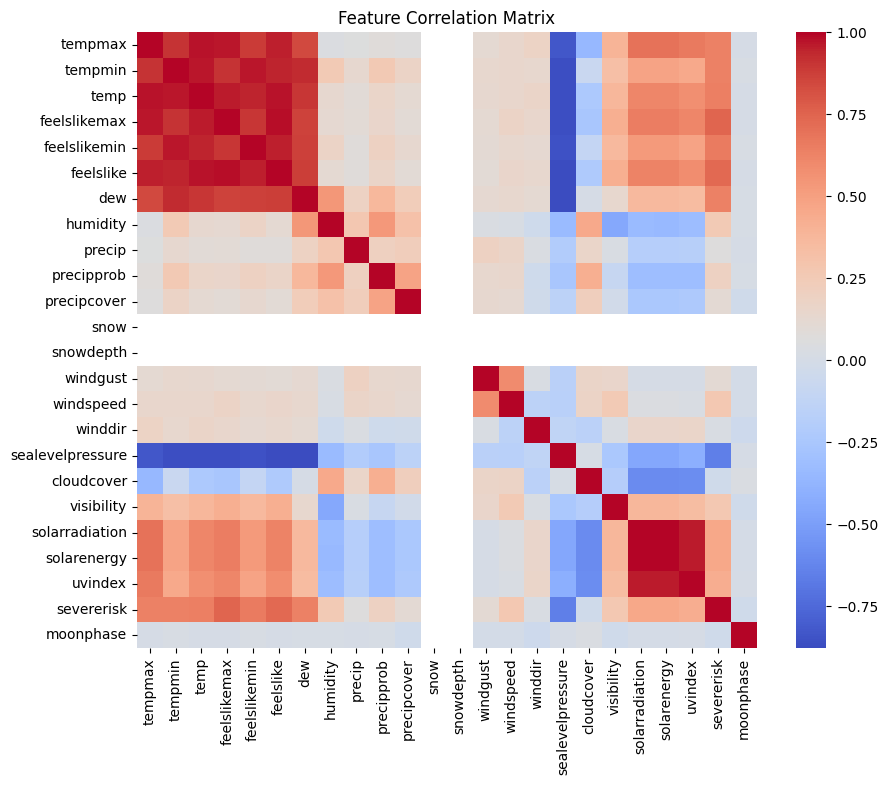

In [90]:
# heat map 
numeric_cols = df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


- The top-left red block confirms extremely high correlation among all temperature and feelslike measures.

- The near bottom-right red cluster corresponds to solar variables (solarradiation, solarenergy, uvindex), nearly identical in behavior.

- The blue region connecting temperature ↔ pressure indicates a strong inverse relationship, meaning low pressure aligns with high temperature (typical of stormy or tropical patterns).

- Cloudcover forms a bridge between humidity and solar, showing its dual role in influencing both moisture and light intensity.

- Wind variables remain relatively neutral (light colors), confirming their independence.

- Severerisk appears moderately red in relation to temperature and solar metrics (but again this just base on 1000 non-null sample)

- The very light to white group (weak or no correlation) include moonphase, snow and snowdepth



#### Modeling Recommendations
- Reduce feature redundancy by selecting one representative from each correlated cluster
- Standardize or normalize features with different scales (e.g., pressure, solarenergy, humidity).  
- Drop constant or NaN-heavy variables (snow, snowdepth, moonphase).  


##### 3.2. Tương quan giữa các categorical feature với temp - Dung làm

#### A. ANOVA Test
Here are the following categorical features: name, preciptype, conditions, description, icon, stations. <br>

- **name**: only include 1 unique feature "Hanoi", so we will not consider this feature 
- **preciptype**: only has 1 unique value (rain) and 987 missing values, which will be interpreted as no rain ( since according to the page, preciptype "Only present when precipitation has been recorded", which mean that there is no rain during that day) So we will analyze new categorical feature **is_rain** instead (having 2 unique value 1 for rain, 0 for no rain)
- **conditions**: has 6 unique values
- **description**: has 35 unique values
- **icon**: has 4 unique value
- **stations**: has có 16 unique values

Method: ANOVA (Analysis of Variance) is used to test whether the mean of a variable differs significantly across groups (categorical levels) <br>

- H0 (Null Hypothesis): There is no difference in mean temperature between groups

- H1 (Alternative Hypothesis): There is a significant difference in mean temperature between at least two groups 

- alpha = 5%

- Note: for stations and description features, we will do seperate ANOVA test after spimplying

In [91]:
# creating new binary feature is_rain for analysing preciptype feature
df.set_index('datetime', inplace= True)
df["is_rain"] = (~df["preciptype"].isna()).astype(int)
df['is_rain'].head()

datetime
2015-09-20    1
2015-09-21    1
2015-09-22    1
2015-09-23    1
2015-09-24    1
Name: is_rain, dtype: int64

In [92]:
from scipy import stats

categorical_cols = ['is_rain', 'conditions', 'icon']
target = 'temp'

results = []

for col in categorical_cols:
    groups = [group[target].dropna() for name, group in df.groupby(col)]
    if len(groups) > 1:
        # ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Đánh giá kết quả dựa trên p-value
        if p_value < 0.05:
            conclusion = "Reject H0: Significant difference between groups"
        else:
            conclusion =  "Accept H0: No significant difference"
        
        results.append({
            'feature': col,
            'p_value': round(p_value, 5),
            'conclusion': conclusion
        })

results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)


KeyError: 'conditions'

#### B. Descriptive Analysis

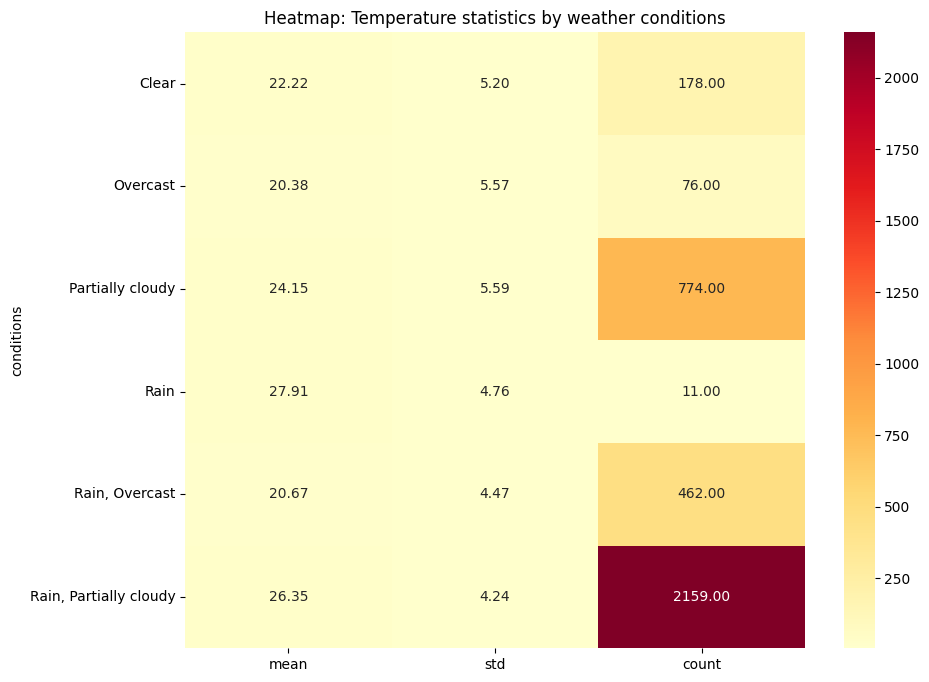

In [ ]:
# conditions and temp
summary = df.groupby('conditions')['temp'].agg(['mean', 'std', 'count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Heatmap: Temperature statistics by weather conditions')
plt.show()

##### Temperature Analysis by Weather Conditions

**1. OBSERVATION COUNT:** <br>

- *"Rain, Partially cloudy"* has the largest count (2159) → most common weather condition
- *"Rain"* (pure rain) has very few observations (only 11) → need caution when analyzing this group
- *"Clear"* has relatively few observations (178) compared to cloudy/rainy groups

**2. AVERAGE TEMPERATURE (MEAN):**
- *"Rain"* has the highest temperature (27.91°C)
- *"Rain, Partially cloudy"* is also quite high (26.35°C)
- *"Overcast"* and *"Rain, Overcast"* have the lowest temperatures (~20.38-20.67°C)

**3. VARIABILITY (STD):**
- *"Partially cloudy"* has the highest standard deviation (5.59) → strong temperature fluctuations
- *"Rain, Partially cloudy"* has the lowest deviation (4.24) → stable temperatures
- *"Rain"* conditions generally have more stable temperatures

**4. KEY INSIGHTS:**

4.1. Unexpected Findings:
- Rain doesn't always cool things down: *"Rain"* group has the highest temperature (27.91°C)
- Clouds have clear cooling effect: Overcast groups have the lowest temperatures

4.2. Hypothesis:
- *"Rain"* with few observations might be summer showers → high temperatures
- Overcast (heavy clouds) blocks solar radiation → effective cooling
- Partially cloudy allows both sun and clouds → large temperature variations

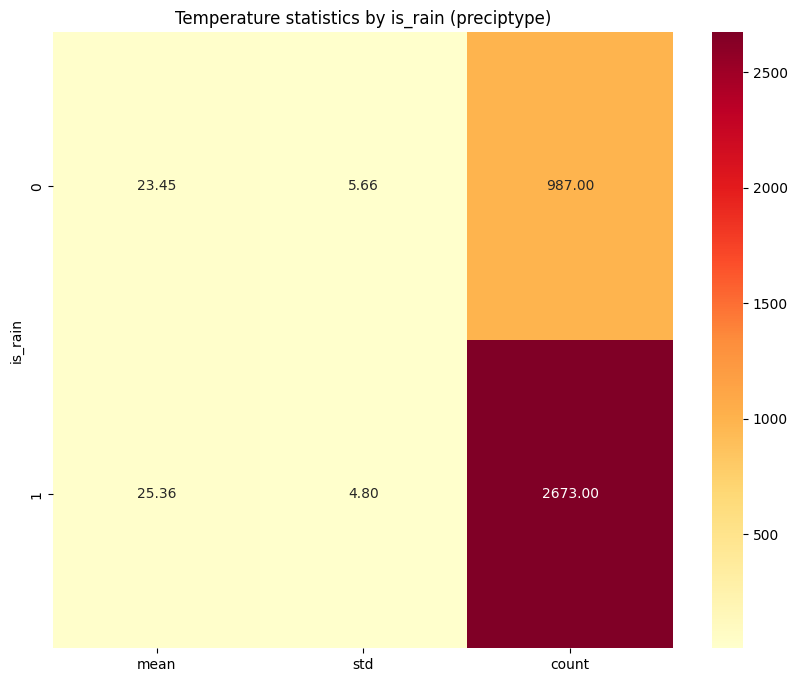

In [ ]:
# is_rain (preciptype) and temp
summary = df.groupby('is_rain')['temp'].agg(['mean', 'std', 'count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Temperature statistics by is_rain (preciptype)')
plt.show()

##### Temperature Analysis by is_rain (preciptype)

**1. OBSERVATION COUNT:** <br>

- *"is_rain"* = 1 (preciptype = rain): 2,673 observations → the majority of the dataset, indicating that rainy days are quite common in Hanoi over the 10-year period.

- *"is_rain"* = 0 (preciptype is null): 987 observations → much fewer, meaning only about 1/4 of the days are completely dry.

→ The data shows a slight imbalance, but both groups are large enough for meaningful comparison.

**2. AVERAGE TEMPERATURE (MEAN):**

- Rainy days (is_rain = 1) have an average temperature of 25.36°C, which is higher than non-rainy days.

- Non-rainy days (is_rain = 0) have a lower average temperature of 23.45°C.

**3. VARIABILITY (STD):**

- Non-rainy days show a higher standard deviation (5.66) → temperature fluctuates more strongly throughout the day.

- Rainy days have a lower standard deviation (4.80) → indicating more stable temperature patterns.

→ Rain likely helps stabilize temperature variations within the day.

**4. KEY INSIGHTS:** (Similar to conditions feature)

4.1. Unexpected Findings: 

- Rainy days are not necessarily cooler — they even show a higher average temperature.

- Non-rainy days fluctuate more, likely due to stronger day–night contrasts (hot days, cool nights).

4.2. Hypothesis:

- Rain mostly occurs in summer, leading to higher mean temperatures despite rainfall.

- Dry periods are more frequent in winter, resulting in lower and more variable temperatures.

- Rain clouds and humidity help moderate temperature swings → lower standard deviation.

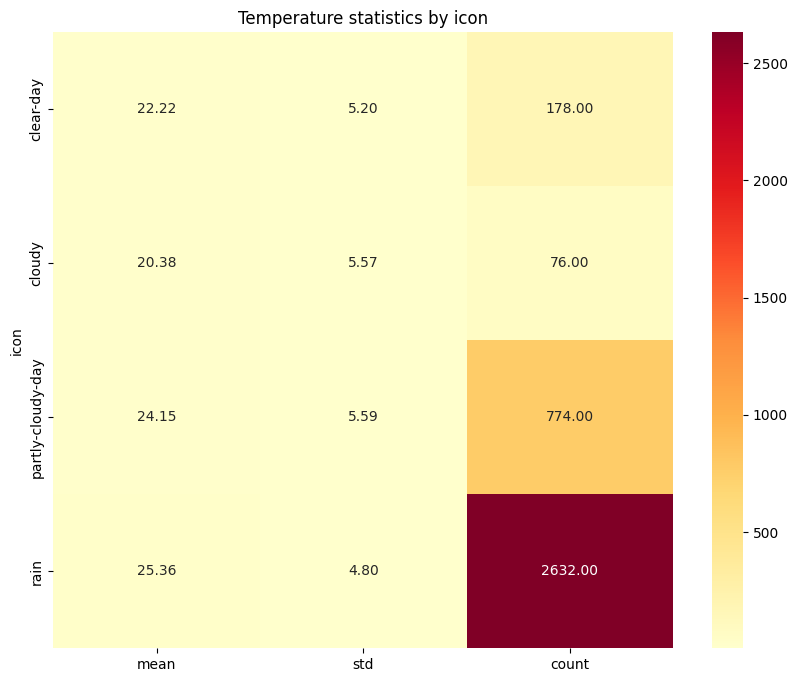

In [ ]:
# icon and temp
summary = df.groupby('icon')['temp'].agg(['mean', 'std', 'count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Temperature statistics by icon')
plt.show()

##### Temperature Analysis by Weather Icons

**1. OBSERVATION COUNT:** <br>
- *"Rain"* has the largest count (2632) → most common weather condition in the dataset.  
- *"Partly-cloudy-day"* follows with (774) observations.  
- *"Clear-day"* has (178) and *"Cloudy"* only (76) → relatively rare conditions.  

**2. AVERAGE TEMPERATURE (MEAN):**  
- *"Rain"* shows the highest mean temperature (25.36°C) — possibly indicating warm rain or tropical showers.  
- *"Partly-cloudy-day"* also has a relatively high temperature (24.15°C).  
- *"Clear-day"* averages (22.22°C) — moderate, not as high as expected for sunny conditions.  
- *"Cloudy"* has the lowest mean temperature (20.38°C) → typical cooling effect from heavy cloud cover.  

**3. VARIABILITY (STD):**  
- *"Partly-cloudy-day"* has the highest temperature variation (5.59) → large day-to-day fluctuations.  
- *"Cloudy"* and *"Clear-day"* show similar standard deviations (~5.20–5.57).  
- *"Rain"* has the most stable temperatures (4.80) → rain likely occurs under consistent temperature conditions.  

**4. KEY INSIGHTS:**  (Similar to condition feature)

4.1. **Unexpected Findings:**  
- Rainy periods are not necessarily cold — *"Rain"* has the highest mean temperature.  
- Clear conditions are not the hottest — perhaps due to strong morning–evening variation.  

4.2. **Hypotheses:**  
- The dominance of rain samples suggests a tropical or monsoon climate pattern.  
- *"Cloudy"* conditions lower temperatures by blocking solar radiation.  
- *"Partly-cloudy"* days allow both sunlight and shade, leading to wider temperature swings.


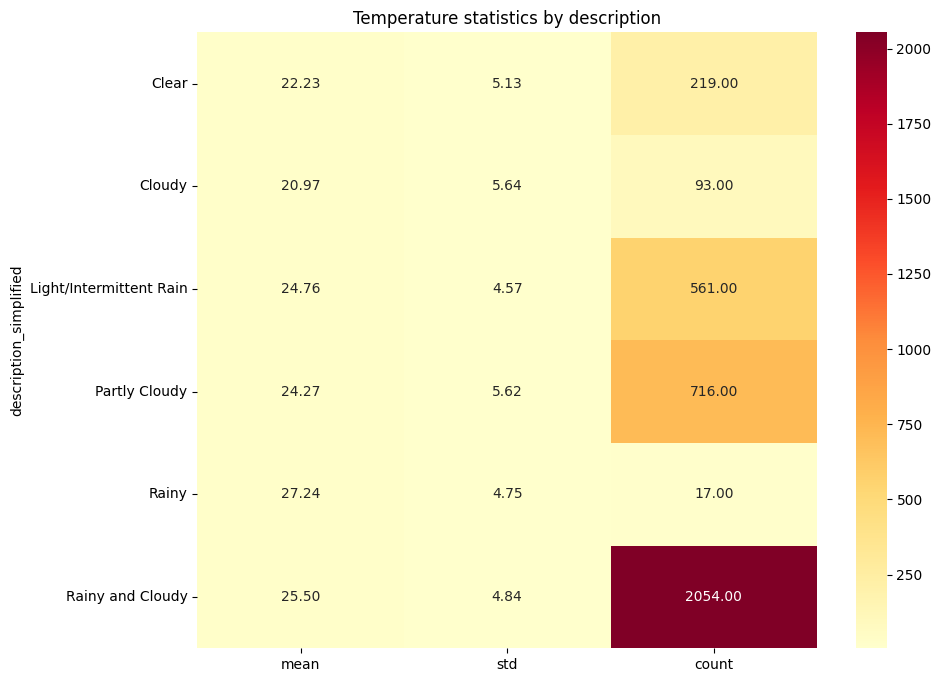

In [ ]:
# description and temp
def simplify_description(desc):
    if not isinstance(desc, str) or desc.strip() == "":
        return "Unknown"

    desc = desc.lower().strip()

    # Nhóm có mưa
    if "rain" in desc:
        # Các cụm thể hiện chỉ có mưa nhẹ hoặc rải rác
        if "chance of rain" in desc or "rain clearing" in desc:
            return "Light/Intermittent Rain"
        # Mưa kết hợp với nhiều mây hoặc mây rải rác
        elif "cloudy" in desc or "partly cloudy" in desc:
            return "Rainy and Cloudy"
        # Các trường hợp còn lại có từ "rain"
        else:
            return "Rainy"

    # Nhóm có nắng/mây rải rác
    elif "partly cloudy" in desc or "mostly sunny" in desc:
        return "Partly Cloudy"

    # Nhóm nhiều mây
    elif "cloudy" in desc or "overcast" in desc:
        return "Cloudy"

    # Nhóm trời quang 
    elif "clear" in desc or "sunny" in desc:
        return "Clear"

    # Nhóm chuyển tiếp 
    elif "clearing" in desc:
        return "Clearing"
    elif "becoming cloudy" in desc:
        return "Becoming Cloudy"

    # Mặc định
    else:
        return "Other"

df["description_simplified"] = df["description"].apply(simplify_description)

summary = df.groupby('description_simplified')['temp'].agg(['mean', 'std', 'count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Temperature statistics by description')
plt.show()


In [ ]:
categorical_cols = ["description_simplified"]
target = 'temp'

results = []

for col in categorical_cols:
    groups = [group[target].dropna() for name, group in df.groupby(col)]
    if len(groups) > 1:
        # ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Đánh giá kết quả dựa trên p-value
        if p_value < 0.05:
            conclusion = "Reject H0: Significant difference between groups"
        else:
            conclusion =  "Accept H0: No significant difference"
        
        results.append({
            'feature': col,
            'p_value': round(p_value, 5),
            'conclusion': conclusion
        })

results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)


                  feature  p_value  \
0  description_simplified      0.0   

                                         conclusion  
0  Reject H0: Significant difference between groups  


##### Analysis Description
According to ANOVA Test, *"description"* feature after splitting is significant. 

However, considering this feature is actually a more detailed version of "conditions" and "icon", we will not conduct further analysis on this feature and might drop it 

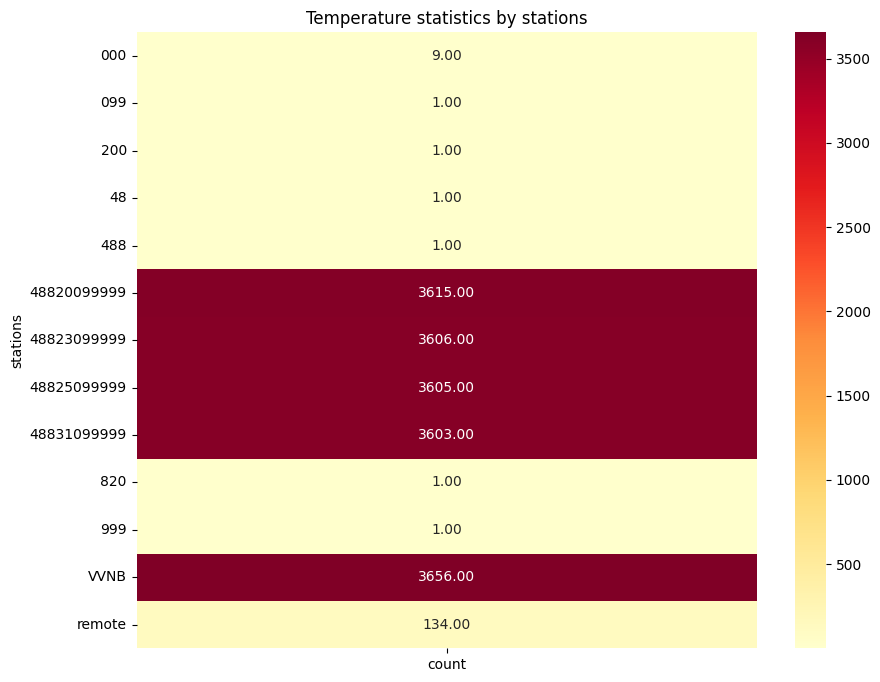

In [ ]:
# stations and temp
# spliting list of station: xem xét mức độ frequency của các trạm
df_exploded = df.assign(stations=df['stations'].str.split(',')).explode('stations')
df_exploded['stations'] = df_exploded['stations'].str.strip() 

summary = df_exploded.groupby('stations')['temp'].agg(['count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Temperature statistics by stations')
plt.show()


#### stations
The stations feature lists the weather stations contributing to each daily observation.

To simplify analysis, we selected the most frequently occurring station in the entire dataset whenever a record listed multiple stations. This approach assumes that the most common station serves as the primary source of weather data, while additional stations provide supplemental information.

The new variable station_main therefore represents the dominant weather station associated with each observation.

In [ ]:
from collections import Counter

# Tách tất cả các trạm ra và đếm tần suất
station_counts = Counter(
    station.strip()
    for stations in df['stations'].dropna()
    for station in stations.split(',')
)


In [ ]:
def choose_main_station(stations):
    # Nếu giá trị missing hoặc không phải string
    if not isinstance(stations, str):
        return None
    # Tách và loại khoảng trắng
    station_list = [s.strip() for s in stations.split(',')]
    # Nếu chỉ có 1 trạm, trả về luôn
    if len(station_list) == 1:
        return station_list[0]
    # Nếu có nhiều trạm, chọn trạm xuất hiện nhiều nhất trong toàn bộ dataset
    return max(station_list, key=lambda s: station_counts[s])


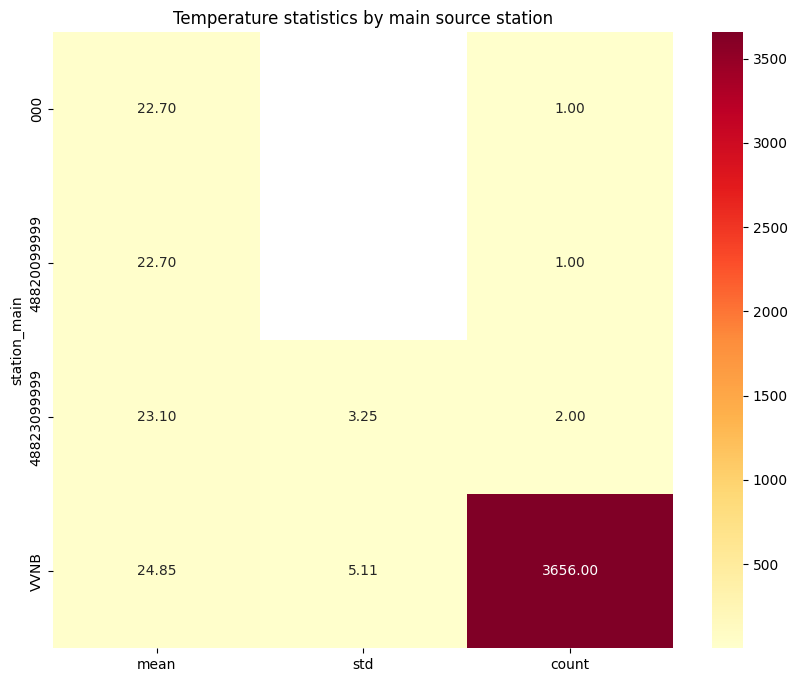

In [ ]:
df['station_main'] = df['stations'].apply(choose_main_station)

summary = df.groupby('station_main')['temp'].agg(['mean', 'std', 'count']).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(summary, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Temperature statistics by main source station')
plt.show()


In [ ]:
categorical_cols = ['station_main']
target = 'temp'

results = []

for col in categorical_cols:
    groups = [group[target].dropna() for name, group in df.groupby(col)]
    if len(groups) > 1:
        # ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)
        
        # Đánh giá kết quả dựa trên p-value
        if p_value < 0.05:
            conclusion = "Reject H0: Significant difference between groups"
        else:
            conclusion =  "Accept H0: No significant difference"
        
        results.append({
            'feature': col,
            'p_value': round(p_value, 5),
            'conclusion': conclusion
        })

print('ANOVA test for station_main')
results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)


ANOVA test for station_main
        feature  p_value                            conclusion
0  station_main  0.89983  Accept H0: No significant difference


#### Result Analysis
According to ANOVA Test, station_main is not significant

There are four distinct stations: 000, 48820099999, 48823099999, and VNNB.

Among these, VNNB clearly dominates with 3,656 observations, while the others have only 1–2 data points each.

The average temperature recorded by VNNB is 24.85°C, with a standard deviation of 5.11°C, indicating normal daily variability.

The remaining stations (000, 48820099999, and 48823099999) have too few samples to be statistically meaningful — their means (around 22–23°C) are similar but based on negligible counts.

#### Recommendation
Since Visual Crossing aggregates weather data from multiple local stations but here almost all observations come from a single source (VNNB), this feature does not add explanatory power and should be dropped when training model.



### 4. Outlier 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from src import data_preprocessing as dp 

In [9]:
# 1. Load raw Data
df = dp.load_data(r"data\raw data\Hanoi Daily 10 years.csv")

 Loaded data with shape: (3660, 33)


In [10]:
X = df.drop('temp', axis= 1)
y = df['temp']

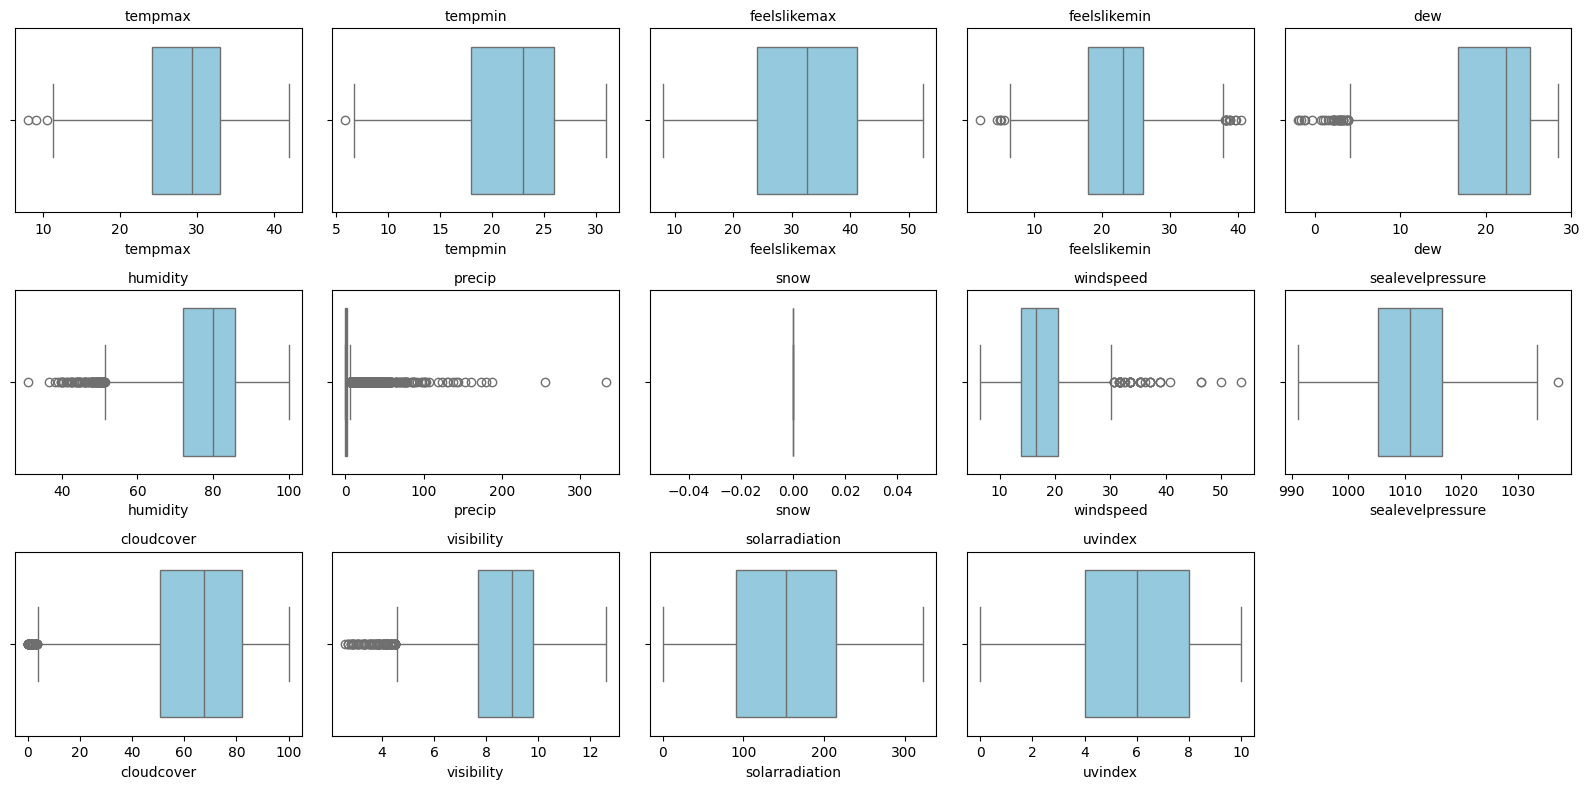

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử X là DataFrame, có cột 'temp'
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'dew',
            'humidity', 'precip', 'snow', 'windspeed', 'sealevelpressure',
            'cloudcover', 'visibility', 'solarradiation', 'uvindex']

plt.figure(figsize=(16, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=X[col], color='skyblue')
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()


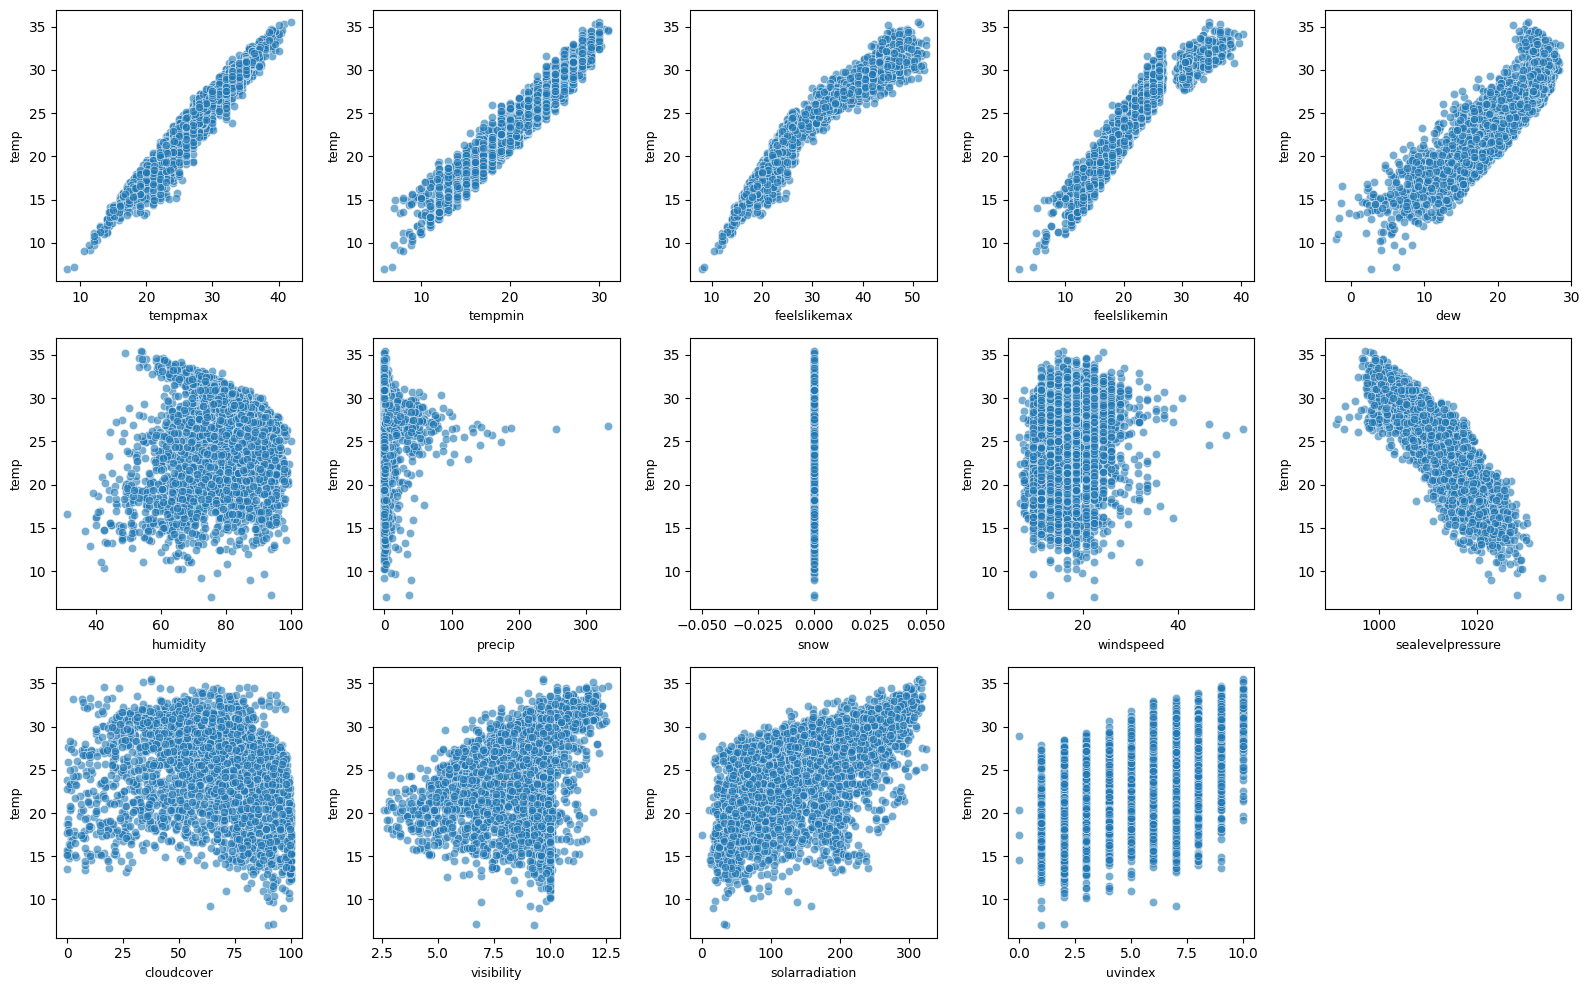

In [11]:
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'dew',
            'humidity', 'precip', 'snow', 'windspeed', 'sealevelpressure',
            'cloudcover', 'visibility', 'solarradiation', 'uvindex']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(x=X[col], y=y, alpha=0.6)
    plt.xlabel(col, fontsize=9)
    plt.ylabel('temp', fontsize=9)
plt.tight_layout()
plt.show()


In [4]:
# 2. basic preprocessing for all data set
# đang để là có drop description 
df = dp.basic_preprocessing(df=df)
print("Shape:", df.shape)

Column 'description' not found, skip dropping.
Column 'severerisk' not found, skip dropping.
Column 'icon' not found, skip dropping.
Column 'station' not found, skip dropping.
Shape: (3660, 28)


In [5]:
# 3. chia train, val, test (tỉ lệ 70/15/15)
target_col = 'temp'
train_size = 0.7
val_size = 0.15
n = len(df)

train_df = df.iloc[:int(train_size*n)]
val_df = df.iloc[int(train_size*n):int((train_size+val_size)*n)]
test_df = df.iloc[int((train_size+val_size)*n):]

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 2562, Val: 549, Test: 549


In [6]:
pipeline1 = Pipeline(steps=[
        ("missing", dp.HandleMissing(drop_threshold=0.05)),
        ("outlier", dp.HandleOutlier(contamination=0.05, n_neighbors=20, drop=True, target_col='temp')),
        ("drop_low_var", dp.DropLowVariance(threshold=0.0)),
        ("drop_high_corr", dp.DropHighlyCorrelated(threshold=0.95, target_col='temp')),
        ("drop_cate", dp.DropCategorical(unique_ratio_threshold=0.9)),
        ("condition_encode", dp.CategoricalEncoder(columns=['icon', 'conditions']))
    ])

# 4. Fit và transform trên preprocessing pipeline

# chỉ fit trên train (học thông số từ train)
pipeline1.fit(train_df)

# transform 
train_processed = pipeline1.transform(train_df)
val_processed = pipeline1.transform(train_df)
test_processed = pipeline1.transform(train_df)


c:\Users\Admin\Documents\ML\group1\src\data_preprocessing.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=self.cols_to_drop_, errors='ignore', inplace=True)


Dropping 129 outliers (5.04%).
Dropping 129 outliers (5.04%).
Dropping 129 outliers (5.04%).
Dropping 129 outliers (5.04%).


c:\Users\Admin\Documents\ML\group1\src\data_preprocessing.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=self.cols_to_drop_, errors='ignore', inplace=True)
c:\Users\Admin\Documents\ML\group1\src\data_preprocessing.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=self.cols_to_drop_, errors='ignore', inplace=True)
c:\Users\Admin\Documents\ML\group1\src\data_preprocessing.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [7]:
train_processed.shape

(2433, 19)

In [11]:
model_pipeline = Pipeline(steps=[
    ("missing", dp.HandleMissing(drop_threshold=0.05)),
    ("outlier", dp.HandleOutlier(contamination=0.05, n_neighbors=20, drop=True, target_col='temp')),
    ("drop_low_var", dp.DropLowVariance(threshold=0.0)),
    ("drop_cate", dp.DropCategorical(unique_ratio_threshold=0.9)),
    ("condition_encode", dp.CategoricalEncoder(columns=['conditions'])),
    ("model", RandomForestRegressor())
])

X_train = train_df.drop(columns=['temp'])

y_train = train_df['temp']

param_grid = {
    "outlier__contamination": [0.01, 0.03, 0.05, 0.1],
    "outlier__n_neighbors": [10, 20, 30]
}

grid = GridSearchCV(model_pipeline, param_grid=param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 18 outliers (1.05%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 52 outliers (3.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 86 outliers (5.04%).
Dropping 171 outliers (10.01%).
Dropping 171 outliers (10.01%).
Dropping 171 outliers (10.01%).
Dropping 171 outliers (10.01%).
Dropping 171 outliers (10.01%).
Dropping 171 outliers (10.01%)

ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: DropLowVariance.fit() takes 2 positional arguments but 3 were given


In [ ]:

param_grid = {
    "outlier__contamination": [0.01, 0.03, 0.05, 0.1],
    "outlier__n_neighbors": [10, 20, 30]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='r2')
grid.fit(train_df)  # train_df có cả 'temp' làm target

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)
